Here, we will generate a pickle file of the Random Forest model using the cleaned datset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned_dataset.csv')
data

,Unnamed: 0,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1,1
1,1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3,0
2,2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2,1
3,3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0,0
4,4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2457,1,1,0,1,2,12,1,1,2,0,2,0,2,1,1,1
2458,2458,0,0,1,1,1,12,0,0,0,0,0,1,2,0,1,1
2459,2459,1,1,0,1,3,13,2,0,2,1,2,1,2,2,1,1
2460,2460,1,0,2,1,1,11,0,0,0,0,0,0,5,3,1,1


In [5]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3,0
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2,1
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,1,1,0,1,2,12,1,1,2,0,2,0,2,1,1,1
2458,0,0,1,1,1,12,0,0,0,0,0,1,2,0,1,1
2459,1,1,0,1,3,13,2,0,2,1,2,1,2,2,1,1
2460,1,0,2,1,1,11,0,0,0,0,0,0,5,3,1,1


In [6]:
data.describe()

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
count,2462.000000,2462.000000,2462.00000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000
mean,1.201462,0.534931,1.11576,1.781478,1.300162,14.187652,0.585297,0.272543,3.537774,1.969537,3.438262,1.344842,2.611292,1.562957,1.219334,0.500000
std,0.527995,0.498880,0.72288,1.017210,1.155377,3.204483,0.798614,0.445358,3.476863,3.099509,3.385085,1.133909,1.205939,1.064697,1.006190,0.500102
min,0.000000,0.000000,0.00000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.00000,1.000000,1.000000,13.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.500000
75%,2.000000,1.000000,2.00000,2.000000,2.000000,16.000000,1.000000,1.000000,7.000000,2.000000,7.000000,2.000000,3.000000,2.000000,2.000000,1.000000
max,2.000000,1.000000,2.00000,5.000000,3.000000,25.000000,3.000000,1.000000,18.000000,15.000000,17.000000,3.000000,6.000000,3.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

Department                    0
Gender                        0
Marital Status                0
Job Level                     0
Job Satisfaction              0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

**Splitting the dataset**

In [10]:
X = data.iloc[:,0:15]
Y = data.iloc[:,-1]

In [11]:
X

,Department,Gender,Marital Status,Job Level,Job Satisfaction,Salary Hike (%),Stock Option Level,Over Time,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction
0,2,0,2,2,3,11,0,1,4,0,5,2,0,0,1
1,1,1,1,2,2,23,1,0,7,1,7,0,3,2,3
2,1,1,2,1,0,15,0,1,0,0,0,1,3,0,2
3,1,0,1,1,0,11,0,1,7,3,0,3,3,2,0
4,1,1,1,1,2,12,1,0,2,2,2,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,1,1,0,1,2,12,1,1,2,0,2,0,2,1,1
2458,0,0,1,1,1,12,0,0,0,0,0,1,2,0,1
2459,1,1,0,1,3,13,2,0,2,1,2,1,2,2,1
2460,1,0,2,1,1,11,0,0,0,0,0,0,5,3,1


In [12]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
2457    1
2458    1
2459    1
2460    1
2461    1
Name: Attrition (Yes/No), Length: 2462, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Model Building**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_RF = random_forest.predict(X_test)

In [16]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy of Random Forest", accuracy_RF * 100.0)

Accuracy of Random Forest 94.72259810554804


In [17]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       384
           1       0.94      0.95      0.95       355

    accuracy                           0.95       739
   macro avg       0.95      0.95      0.95       739
weighted avg       0.95      0.95      0.95       739



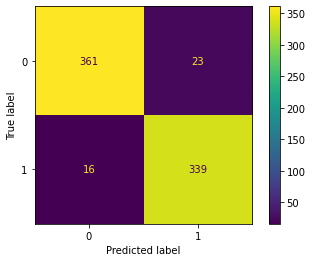

In [22]:
cm = confusion_matrix(y_test, y_pred_RF)
display = metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

**Creating Pickle file of the model**

In [23]:
import pickle
pickle.dump(random_forest, open('model.pkl','wb'))